In [4]:
import re
import string

import matplotlib.pyplot as plt
import nltk
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import STOPWORDS, ImageColorGenerator, WordCloud

data = pd.read_csv("C:\\Users\\Muhammad Midhat\\Desktop\\Russia vs Ukraine Tweets\\R vs U Twitter\\filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1581458719845781504  1581407763250311168  2022-10-16 01:35:15 UTC   
1  1581458717585068034  1581458717585068034  2022-10-16 01:35:15 UTC   
2  1581458717194665985  1581382234841370630  2022-10-16 01:35:14 UTC   
3  1581458708877684736  1581259880928710656  2022-10-16 01:35:12 UTC   
4  1581458704422928384  1581431262476005377  2022-10-16 01:35:11 UTC   

         date      time  timezone              user_id        username  \
0  2022-10-16  01:35:15         0  1577805690185342976         lace891   
1  2022-10-16  01:35:15         0           3195763956  latinos4bernie   
2  2022-10-16  01:35:14         0           2251978568      dennisp220   
3  2022-10-16  01:35:12         0  1502425378001850370        jstarbux   
4  2022-10-16  01:35:11         0  1195425713182015488   micahbabcock4   

                                      name place  ... geo source user_rt_id  \
0                                   Lace89 

In [5]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [6]:
data = data[["username", "tweet", "language"]]

In [7]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [8]:
data["language"].value_counts()

en     8833
pt      328
qme     215
ja       80
und      77
in       77
ru       69
it       69
es       34
ca       27
de       18
ar       18
fi       14
nl       12
ur       11
pl       11
hi       10
th       10
fr        9
zh        9
tl        8
qht       8
qam       7
uk        7
et        6
zxx       5
sv        5
fa        5
ro        4
vi        3
no        3
cs        3
ht        2
tr        2
ml        1
art       1
cy        1
ta        1
Name: language, dtype: int64

In [9]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\Muhammad
[nltk_data]     Midhat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


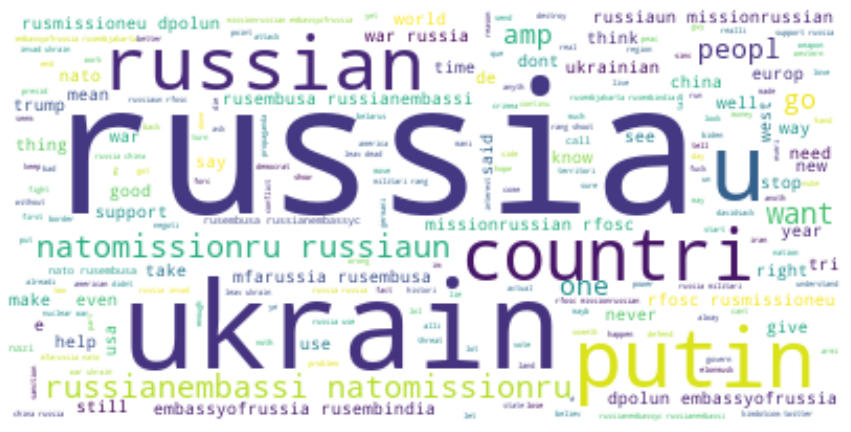

In [10]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Muhammad
[nltk_data]     Midhat\AppData\Roaming\nltk_data...


                                               tweet  Positive  Negative  \
0  aaronparna corrupt countri europ give littl pi...     0.000     0.336   
1  russia kidnap traffick ukrainian children russ...     0.000     0.000   
2  johnstonetin jonathanturley fbi agent fail rus...     0.079     0.201   
3                    missflybynight russia left over     0.000     0.000   
4    johnfetterman democrat brought you…  open bo...     0.000     0.413   

   Neutral  
0    0.664  
1    1.000  
2    0.719  
3    1.000  
4    0.587  


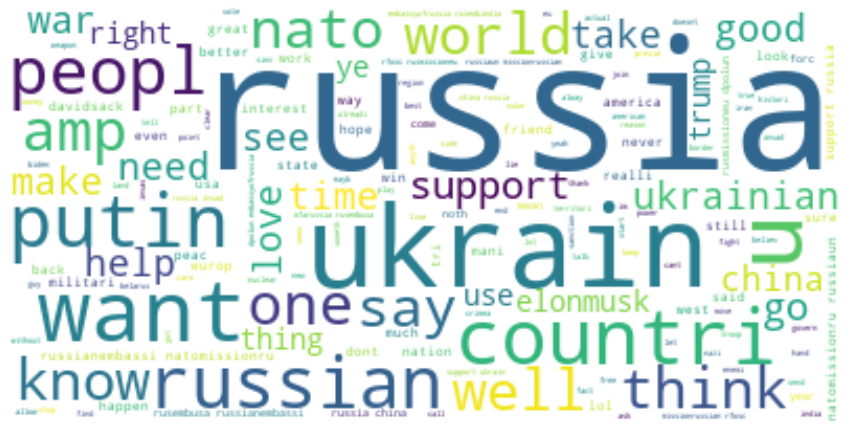

In [12]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

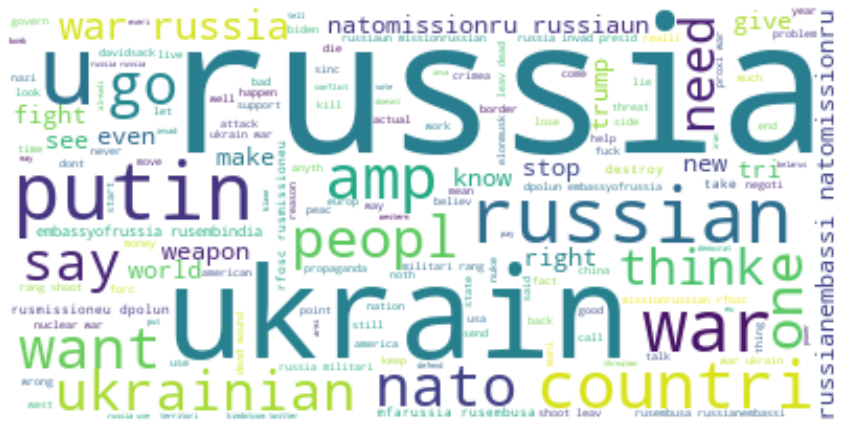

In [13]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()